In [11]:
# --- STEP 1: Install dependencies ---
!pip install kagglehub pandas matplotlib --quiet


In [12]:
# --- STEP 2: Import libraries ---
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from google.colab import files

In [13]:
# --- STEP 3: Download datasets from Kaggle ---
print("📦 Downloading datasets from Kaggle...")

path_gold_silver = kagglehub.dataset_download("lbronchal/gold-and-silver-prices-dataset")
path_usd_inr = kagglehub.dataset_download("imbikramsaha/usd-inr-data")

print("\n✅ Download complete!")
print("Gold & Silver dataset path:", path_gold_silver)
print("USD-INR dataset path:", path_usd_inr)

📦 Downloading datasets from Kaggle...
Using Colab cache for faster access to the 'gold-and-silver-prices-dataset' dataset.
Using Colab cache for faster access to the 'usd-inr-data' dataset.

✅ Download complete!
Gold & Silver dataset path: /kaggle/input/gold-and-silver-prices-dataset
USD-INR dataset path: /kaggle/input/usd-inr-data


In [14]:
# --- STEP 4: Auto-detect and load CSV files ---
print("\n🔍 Scanning dataset folders...")
print("Files in Gold & Silver folder:", os.listdir(path_gold_silver))
print("Files in USD-INR folder:", os.listdir(path_usd_inr))

# Identify files explicitly
gold_path = os.path.join(path_gold_silver, "gold_price.csv")
silver_path = os.path.join(path_gold_silver, "silver_price.csv")
usd_inr_path = os.path.join(path_usd_inr, "USD-INR.csv")

# Load datasets
gold_df = pd.read_csv(gold_path)
silver_df = pd.read_csv(silver_path)
usd_inr = pd.read_csv(usd_inr_path)

print("\n✅ Files loaded successfully!")
print("Gold dataset columns:", gold_df.columns.tolist())
print("Silver dataset columns:", silver_df.columns.tolist())
print("USD-INR dataset columns:", usd_inr.columns.tolist())


🔍 Scanning dataset folders...
Files in Gold & Silver folder: ['gold_price.csv', 'silver_price.csv']
Files in USD-INR folder: ['USD-INR.csv']

✅ Files loaded successfully!
Gold dataset columns: ['date', 'price']
Silver dataset columns: ['date', 'price']
USD-INR dataset columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']


In [15]:
# --- STEP 5: Clean & standardize columns ---
gold_df.rename(columns={'date': 'Date', 'price': 'Gold'}, inplace=True)
silver_df.rename(columns={'date': 'Date', 'price': 'Silver'}, inplace=True)
usd_inr.rename(columns={'Open': 'USDINR_Open'}, inplace=True)

# Convert to datetime
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
silver_df['Date'] = pd.to_datetime(silver_df['Date'])
usd_inr['Date'] = pd.to_datetime(usd_inr['Date'])

In [16]:
# --- STEP 6: Merge gold and silver datasets ---
gold_silver = pd.merge(gold_df, silver_df, on='Date', how='inner')

In [17]:
# --- STEP 7: Filter required date range ---
start_date = "2018-01-01"
end_date = "2020-12-31"

gold_silver = gold_silver[
    (gold_silver['Date'] >= start_date) & (gold_silver['Date'] <= end_date)
]
usd_inr = usd_inr[
    (usd_inr['Date'] >= start_date) & (usd_inr['Date'] <= end_date)
]

In [18]:
# --- STEP 8: Merge with USD-INR dataset ---
merged = pd.merge(gold_silver, usd_inr[['Date', 'USDINR_Open']], on='Date', how='inner')

In [20]:
# --- STEP 9: Perform currency conversion ---
# Gold (USD/oz → INR/10g) = Gold × USDINR × (10 / 31.1035)
# Silver (USD/oz → INR/kg) = Silver × USDINR × (1000 / 31.1035)
merged['Gold Price (INR / 10gms)'] = merged['Gold'] * merged['USDINR_Open'] * (10 / 31.1035)
merged['Silver Price (INR / 1kg)'] = merged['Silver'] * merged['USDINR_Open'] * (1000 / 31.1035)

In [21]:
# --- STEP 10: Final clean dataset ---
final = merged[['Date', 'Gold Price (INR / 10gms)', 'Silver Price (INR / 1kg)']].sort_values('Date')

In [22]:
# --- STEP 11: Save inside Colab & make downloadable ---
output_path = "/content/gold_silver_in_inr_2018_2020.csv"
final.to_csv(output_path, index=False)

print("\n✅ Final dataset saved at:", output_path)
print("\n📄 Sample of final dataset:")
display(final.head())


✅ Final dataset saved at: /content/gold_silver_in_inr_2018_2020.csv

📄 Sample of final dataset:


,Date,Gold Price (INR / 10gms),Silver Price (INR / 1kg)
0,2018-01-02,26941.496381,35030.824150
1,2018-01-03,26793.885998,34895.832209
2,2018-01-04,26802.260060,34927.555332
3,2018-01-05,26835.329145,34951.225865
4,2018-01-08,26847.986699,34924.044973


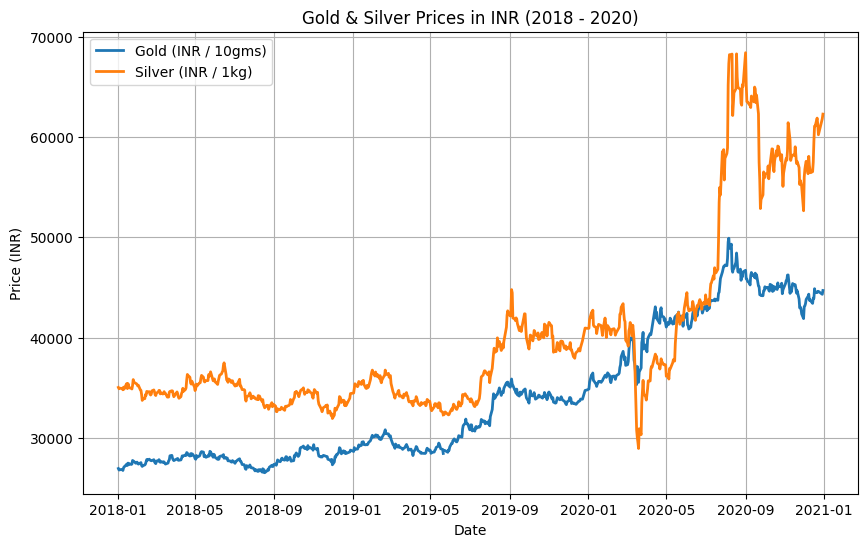

In [23]:
# --- STEP 12: Plot trends ---
plt.figure(figsize=(10, 6))
plt.plot(final['Date'], final['Gold Price (INR / 10gms)'], label='Gold (INR / 10gms)', linewidth=2)
plt.plot(final['Date'], final['Silver Price (INR / 1kg)'], label='Silver (INR / 1kg)', linewidth=2)
plt.title("Gold & Silver Prices in INR (2018 - 2020)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# --- STEP 13: Trigger download ---
files.download(output_path)
print("📥 Download prompt should appear below!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Download prompt should appear below!


In [25]:
# --- STEP 1: Imports ---
import pandas as pd
from google.colab import files

In [26]:
# --- STEP 2: Read the uploaded Nifty-Sensex dataset ---
nifty_sensex_path = "/content/merged_dataset_of_metals_and_stockmarket.csv"
nifty_sensex = pd.read_csv(nifty_sensex_path)

print("📄 Nifty & Sensex dataset loaded!")
print("Columns:", nifty_sensex.columns.tolist())
print(nifty_sensex.head())

📄 Nifty & Sensex dataset loaded!
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'USD', 'GBP', 'EURO', 'Date.1', 'Price_Nifty', 'Open_Nifty', 'High_Nifty', 'Low_Nifty', 'Vol._Nifty', 'Change %_Nifty', 'Price_Sensex', 'Open_Sensex', 'High_Sensex', 'Low_Sensex', 'Vol._Sensex', 'Change %_Sensex']
         Date  Price   Open   High    Low  Volume  Chg%     USD    GBP   EURO  \
0  2020-12-31  50081  49940  50139  49778     390  0.40  26.485  19.41  21.58   
1  2020-12-30  49881  49840  49950  49599    3650  0.32  26.305  19.33  21.43   
2  2020-12-29  49722  49820  49899  49600   13260 -0.08  26.150  19.36  21.35   
3  2020-12-24  49787  50021  50049  49630   18140 -0.24  25.780  18.97  21.14   
4  2020-12-23  49909  49771  50020  49466   26910  0.28  25.315  18.86  20.77   

   ... High_Nifty  Low_Nifty Vol._Nifty Change %_Nifty Price_Sensex  \
0  ...  14,024.85  13,936.45    452.41M          0.00%    47,751.33   
1  ...  13,997.00  13,864.95    380.68M          0.35%  

In [27]:
# --- STEP 3: Read the existing Gold & Silver (in INR) dataset ---
gold_silver_path = "/content/gold_silver_in_inr_2018_2020.csv"  # adjust if needed
gold_silver = pd.read_csv(gold_silver_path)

print("\n📄 Gold & Silver dataset loaded!")
print("Columns:", gold_silver.columns.tolist())
print(gold_silver.head())


📄 Gold & Silver dataset loaded!
Columns: ['Date', 'Gold Price (INR / 10gms)', 'Silver Price (INR / 1kg)']
         Date  Gold Price (INR / 10gms)  Silver Price (INR / 1kg)
0  2018-01-02              26941.496381              35030.824150
1  2018-01-03              26793.885998              34895.832209
2  2018-01-04              26802.260060              34927.555332
3  2018-01-05              26835.329145              34951.225865
4  2018-01-08              26847.986699              34924.044973


In [28]:
# --- STEP 4: Clean and prepare datasets ---
# Normalize date formats
gold_silver['Date'] = pd.to_datetime(gold_silver['Date'])
nifty_sensex['Date'] = pd.to_datetime(nifty_sensex['Date'])

# Sort both datasets by date
gold_silver.sort_values('Date', inplace=True)
nifty_sensex.sort_values('Date', inplace=True)

# Keep only relevant columns
nifty_sensex_filtered = nifty_sensex[
    ['Date', 'Price_Nifty', 'Price_Sensex']
].copy()

gold_silver_filtered = gold_silver[
    ['Date', 'Gold Price (INR / 10gms)', 'Silver Price (INR / 1kg)']
].copy()

In [29]:
# --- STEP 5: Reindex to create a continuous daily date range ---
start_date = max(gold_silver_filtered['Date'].min(), nifty_sensex_filtered['Date'].min())
end_date = min(gold_silver_filtered['Date'].max(), nifty_sensex_filtered['Date'].max())

# Create full date range (all days between start and end)
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex both datasets to have continuous daily dates
gold_silver_full = gold_silver_filtered.set_index('Date').reindex(all_dates).ffill().bfill().reset_index()
gold_silver_full.rename(columns={'index': 'Date'}, inplace=True)

nifty_sensex_full = nifty_sensex_filtered.set_index('Date').reindex(all_dates).ffill().bfill().reset_index()
nifty_sensex_full.rename(columns={'index': 'Date'}, inplace=True)

In [30]:
# --- STEP 6: Merge after aligning by date ---
merged_df = pd.merge(
    gold_silver_full,
    nifty_sensex_full,
    on='Date',
    how='inner'
)

print("\n✅ Merged and date-mapped dataset preview:")
print(merged_df.head())


✅ Merged and date-mapped dataset preview:
        Date  Gold Price (INR / 10gms)  Silver Price (INR / 1kg) Price_Nifty  \
0 2018-01-02              26941.496381              35030.824150   10,435.55   
1 2018-01-03              26793.885998              34895.832209   10,435.55   
2 2018-01-04              26802.260060              34927.555332   10,435.55   
3 2018-01-05              26835.329145              34951.225865   10,435.55   
4 2018-01-06              26835.329145              34951.225865   10,435.55   

  Price_Sensex  
0    33,812.75  
1    33,812.75  
2    33,812.75  
3    33,812.75  
4    33,812.75  


In [31]:
# --- STEP 7: Save final dataset ---
output_path = "/content/final_date_mapped_dataset.csv"
merged_df.to_csv(output_path, index=False)

print(f"\n💾 Final date-mapped merged dataset saved as: {output_path}")


💾 Final date-mapped merged dataset saved as: /content/final_date_mapped_dataset.csv


In [32]:
# --- STEP 8: Download to your computer (optional) ---
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>